In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bowling_df=pd.read_csv(r"C:\Users\RISHABH\OneDrive\Desktop\DATA\python\t20_csv_files\fact_bowling_summary.csv")

In [3]:
batting_df=pd.read_csv(r"C:\Users\RISHABH\OneDrive\Desktop\DATA\python\t20_csv_files\fact_bating_summary.csv")

In [4]:
batting_df['innings']=1

In [5]:
batting_df['out/not_out']=batting_df['out/not_out'].replace(['out','not_out'],[1,0])

In [6]:
batting_df

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id,innings
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,1,T20I # 1823,1
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,1,T20I # 1823,1
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,1,T20I # 1823,1
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,1,T20I # 1823,1
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,1,T20I # 1823,1
...,...,...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,10,9,2,0,111.11,1,T20I # 1879,1
695,Pakistan Vs England,England,4,Ben Stokes,52,49,5,1,106.12,0,T20I # 1879,1
696,Pakistan Vs England,England,5,Harry Brook,20,23,1,0,86.95,1,T20I # 1879,1
697,Pakistan Vs England,England,6,Moeen Ali,19,13,3,0,146.15,1,T20I # 1879,1


In [7]:
batting_stats=batting_df.groupby('batsmanName').sum('runs').sort_values('runs',ascending=False)

In [8]:
batting_stats

,battingPos,runs,balls,4s,6s,out/not_out,innings
batsmanName,,,,,,,
Virat Kohli,18,296,217,25,8,3,6
Max O'Dowd,14,242,215,22,8,7,8
Suryakumar Yadav,24,239,126,26,9,4,6
Jos Buttler(c),6,225,156,24,7,5,6
Kusal Mendis,15,223,156,17,10,7,8
...,...,...,...,...,...,...,...
Alzarri Joseph,9,0,1,0,0,1,1
Danushka Gunathilaka,4,0,1,0,0,1,1
Deepak Hooda,5,0,3,0,0,1,1


In [9]:
batting_stats['BattingAvg']=(batting_stats['runs'] / batting_stats['out/not_out'])

In [10]:
batting_stats['StrikeRate']=(batting_stats['runs'] / batting_stats['balls'])*100

In [11]:
batting_stats.drop(columns=['battingPos','out/not_out'],inplace=True)

In [12]:
batting_stats['BoundaryRuns']=4*(batting_stats['4s'])+6*(batting_stats['6s'])

In [13]:
batting_stats['%runsinboundary']=(batting_stats['BoundaryRuns']/batting_stats['runs'])*100

In [14]:
batting_stats['avgbowlsfaced/inn']=batting_stats['balls']/batting_stats['innings']

In [15]:
batting_stats['6hittingrate']=batting_stats['balls']/batting_stats['6s']

In [16]:
batting_stats['4hittingrate']=batting_stats['balls']/batting_stats['4s']

In [17]:
batting_stats['non-boundaryruns']=batting_stats['runs']-batting_stats['BoundaryRuns']

In [18]:
batting_stats['non-boundarystrikerate']=((batting_stats['non-boundaryruns'])*100)/(batting_stats['balls']-(batting_stats['4s']+batting_stats['6s']))

In [19]:
batting_stats

,runs,balls,4s,6s,innings,BattingAvg,StrikeRate,BoundaryRuns,%runsinboundary,avgbowlsfaced/inn,6hittingrate,4hittingrate,non-boundaryruns,non-boundarystrikerate
batsmanName,,,,,,,,,,,,,,
Virat Kohli,296,217,25,8,6,98.666667,136.405530,148,50.000000,36.166667,27.125000,8.680000,148,80.434783
Max O'Dowd,242,215,22,8,8,34.571429,112.558140,136,56.198347,26.875000,26.875000,9.772727,106,57.297297
Suryakumar Yadav,239,126,26,9,6,59.750000,189.682540,158,66.108787,21.000000,14.000000,4.846154,81,89.010989
Jos Buttler(c),225,156,24,7,6,45.000000,144.230769,138,61.333333,26.000000,22.285714,6.500000,87,69.600000
Kusal Mendis,223,156,17,10,8,31.857143,142.948718,128,57.399103,19.500000,15.600000,9.176471,95,73.643411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alzarri Joseph,0,1,0,0,1,0.000000,0.000000,0,NaN,1.000000,inf,inf,0,0.000000
Danushka Gunathilaka,0,1,0,0,1,0.000000,0.000000,0,NaN,1.000000,inf,inf,0,0.000000
Deepak Hooda,0,3,0,0,1,0.000000,0.000000,0,NaN,3.000000,inf,inf,0,0.000000


In [20]:
top30batsmen=batting_stats.head(30)

In [21]:
top30batsmen

,runs,balls,4s,6s,innings,BattingAvg,StrikeRate,BoundaryRuns,%runsinboundary,avgbowlsfaced/inn,6hittingrate,4hittingrate,non-boundaryruns,non-boundarystrikerate
batsmanName,,,,,,,,,,,,,,
Virat Kohli,296,217,25,8,6,98.666667,136.405530,148,50.000000,36.166667,27.125000,8.680000,148,80.434783
Max O'Dowd,242,215,22,8,8,34.571429,112.558140,136,56.198347,26.875000,26.875000,9.772727,106,57.297297
Suryakumar Yadav,239,126,26,9,6,59.750000,189.682540,158,66.108787,21.000000,14.000000,4.846154,81,89.010989
Jos Buttler(c),225,156,24,7,6,45.000000,144.230769,138,61.333333,26.000000,22.285714,6.500000,87,69.600000
Kusal Mendis,223,156,17,10,8,31.857143,142.948718,128,57.399103,19.500000,15.600000,9.176471,95,73.643411
Sikandar Raza,219,148,16,11,8,27.375000,147.972973,130,59.360731,18.500000,13.454545,9.250000,89,73.553719
Pathum Nissanka,214,196,13,8,7,30.571429,109.183673,100,46.728972,28.000000,24.500000,15.076923,114,65.142857
Alex Hales,212,144,19,10,6,42.400000,147.222222,136,64.150943,24.000000,14.400000,7.578947,76,66.086957
Lorcan Tucker,204,163,19,4,7,40.800000,125.153374,100,49.019608,23.285714,40.750000,8.578947,104,74.285714


In [22]:
top30batsmen.reset_index(inplace=True)

In [23]:
top30batsmen

,batsmanName,runs,balls,4s,6s,innings,BattingAvg,StrikeRate,BoundaryRuns,%runsinboundary,avgbowlsfaced/inn,6hittingrate,4hittingrate,non-boundaryruns,non-boundarystrikerate
0,Virat Kohli,296,217,25,8,6,98.666667,136.405530,148,50.000000,36.166667,27.125000,8.680000,148,80.434783
1,Max O'Dowd,242,215,22,8,8,34.571429,112.558140,136,56.198347,26.875000,26.875000,9.772727,106,57.297297
2,Suryakumar Yadav,239,126,26,9,6,59.750000,189.682540,158,66.108787,21.000000,14.000000,4.846154,81,89.010989
3,Jos Buttler(c),225,156,24,7,6,45.000000,144.230769,138,61.333333,26.000000,22.285714,6.500000,87,69.600000
4,Kusal Mendis,223,156,17,10,8,31.857143,142.948718,128,57.399103,19.500000,15.600000,9.176471,95,73.643411
5,Sikandar Raza,219,148,16,11,8,27.375000,147.972973,130,59.360731,18.500000,13.454545,9.250000,89,73.553719
6,Pathum Nissanka,214,196,13,8,7,30.571429,109.183673,100,46.728972,28.000000,24.500000,15.076923,114,65.142857
7,Alex Hales,212,144,19,10,6,42.400000,147.222222,136,64.150943,24.000000,14.400000,7.578947,76,66.086957
8,Lorcan Tucker,204,163,19,4,7,40.800000,125.153374,100,49.019608,23.285714,40.750000,8.578947,104,74.285714
9,Glenn Phillips,201,127,19,8,5,40.200000,158.267717,124,61.691542,25.400000,15.875000,6.684211,77,77.000000


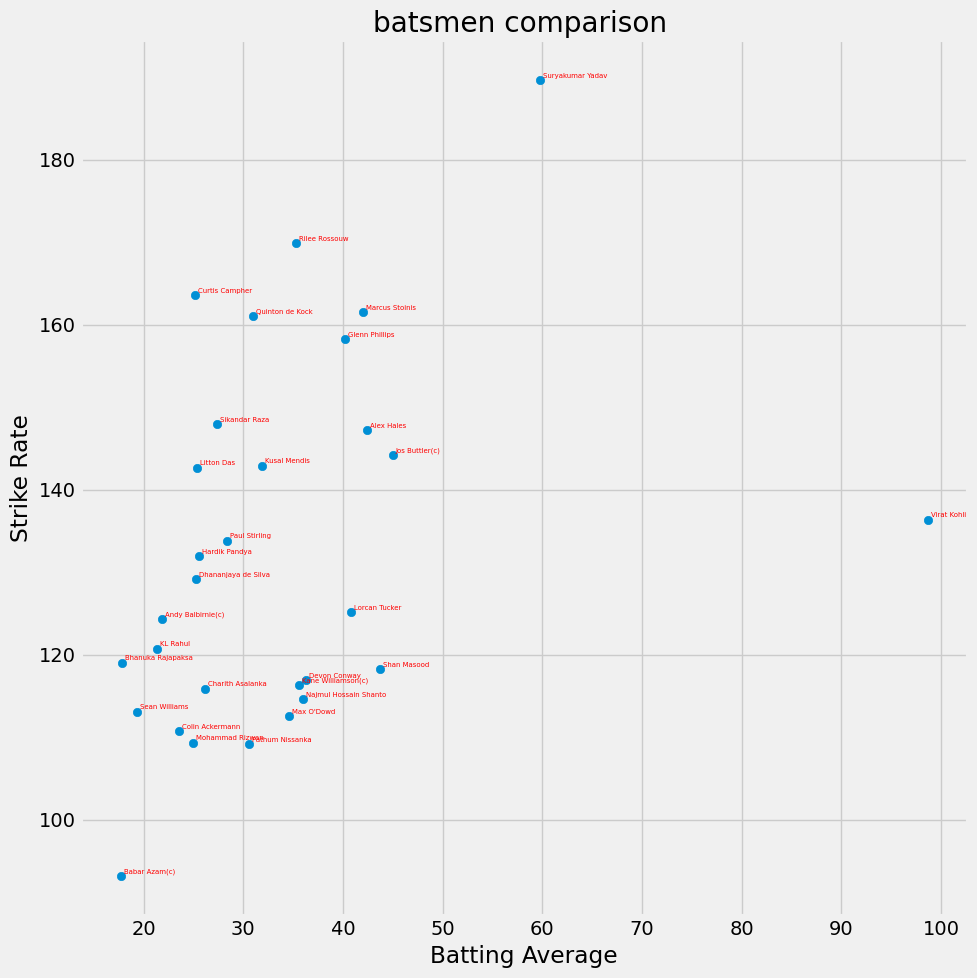

In [24]:
Avg=top30batsmen['BattingAvg']
SR=top30batsmen['StrikeRate']
name=top30batsmen['batsmanName']
nonboundary=top30batsmen['non-boundarystrikerate']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))
plt.scatter(Avg,SR)
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.title('batsmen comparison ')
for i in range(top30batsmen.shape[0]):
     text=plt.text(x=Avg[i]+0.3,y=SR[i]+0.3,s=name[i],
                fontdict=dict(color='red',size=5))
        
plt.tight_layout()

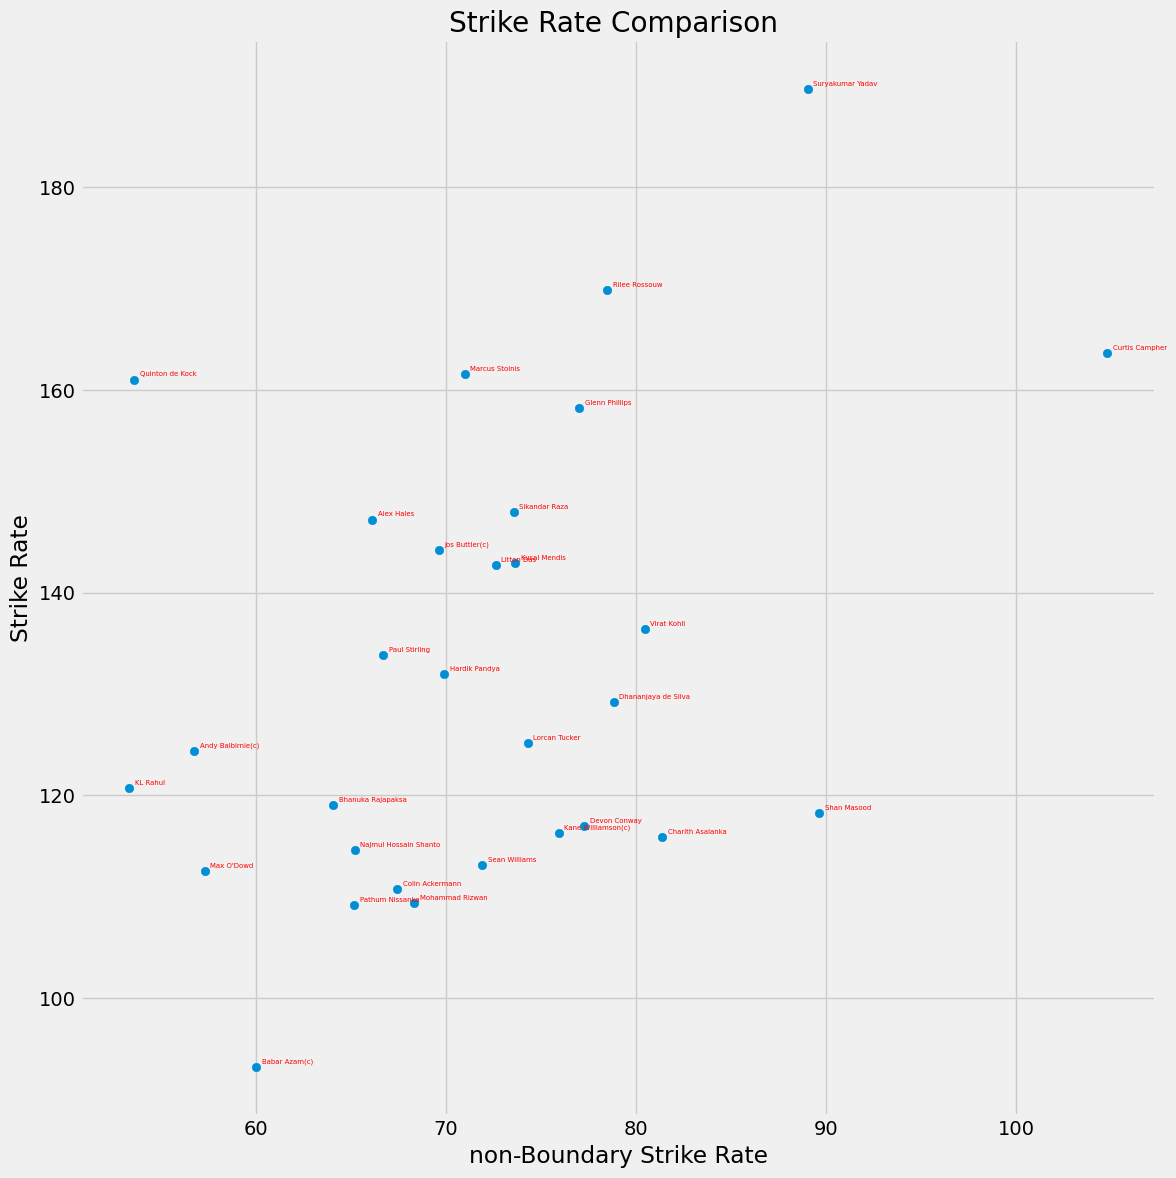

In [25]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,12))
plt.scatter(nonboundary,SR)
plt.xlabel('non-Boundary Strike Rate')
plt.ylabel('Strike Rate')
plt.title('Strike Rate Comparison ')
for i in range(top30batsmen.shape[0]):
     text=plt.text(x=nonboundary[i]+0.3,y=SR[i]+0.3,s=name[i],
                fontdict=dict(color='red',size=5))
        
plt.tight_layout()

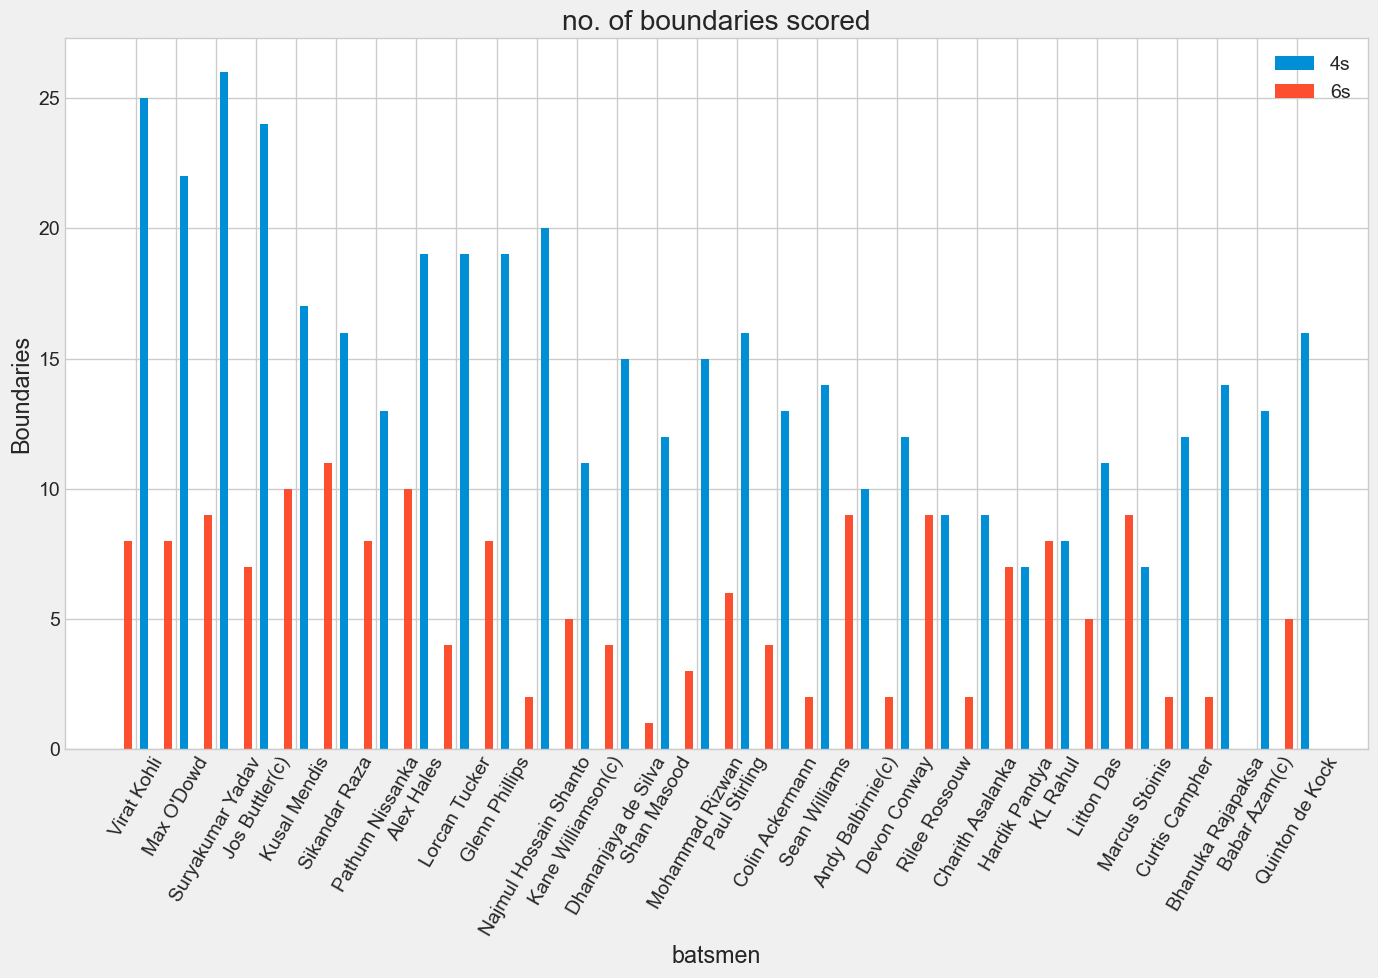

In [26]:
name=top30batsmen['batsmanName']
fours=top30batsmen['4s']
sixes=top30batsmen['6s']

x_index=np.arange(len(name))
width=0.2 
plt.figure(figsize=(14,10))
plt.style.use("seaborn-v0_8-whitegrid")
plt.bar(x_index + width, fours ,width=width,label='4s')
plt.bar(x_index - width, sixes ,width=width,label='6s')
plt.xticks(ticks=x_index, labels= name) 
plt.xlabel('batsmen')
plt.xticks(rotation=60)
plt.ylabel('Boundaries')
plt.legend() 
plt.grid(True)

plt.title('no. of boundaries scored')
plt.tight_layout()

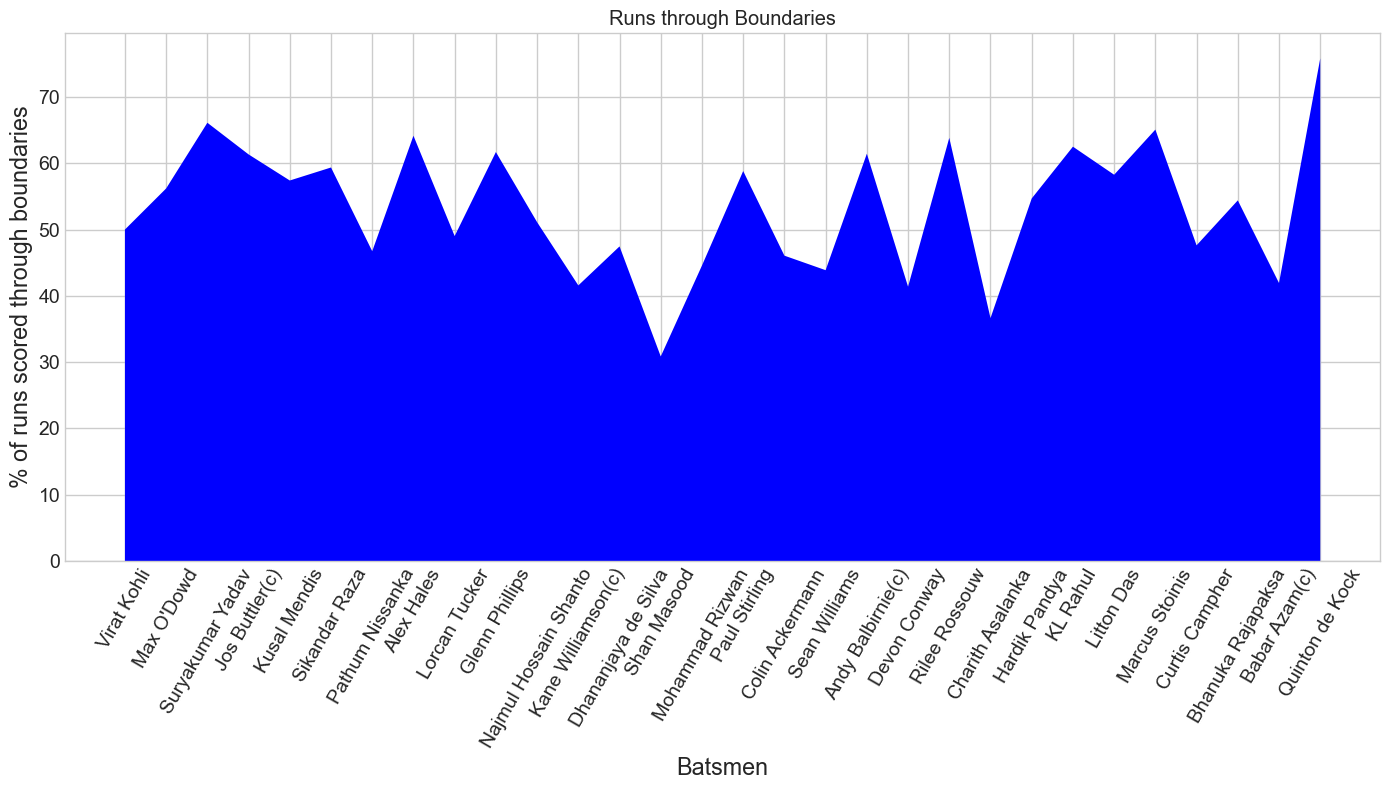

In [27]:
colors=['blue'] 
plt.figure(figsize=(14,8)) 
plt.xlabel('Batsmen') 
plt.ylabel('% of runs scored through boundaries') 
plt.xticks(rotation=60) 
plt.style.use('ggplot') 
plt.stackplot(top30batsmen['batsmanName'],top30batsmen['%runsinboundary'] ,colors=colors) 

plt.title('Runs through Boundaries') 
plt.tight_layout()

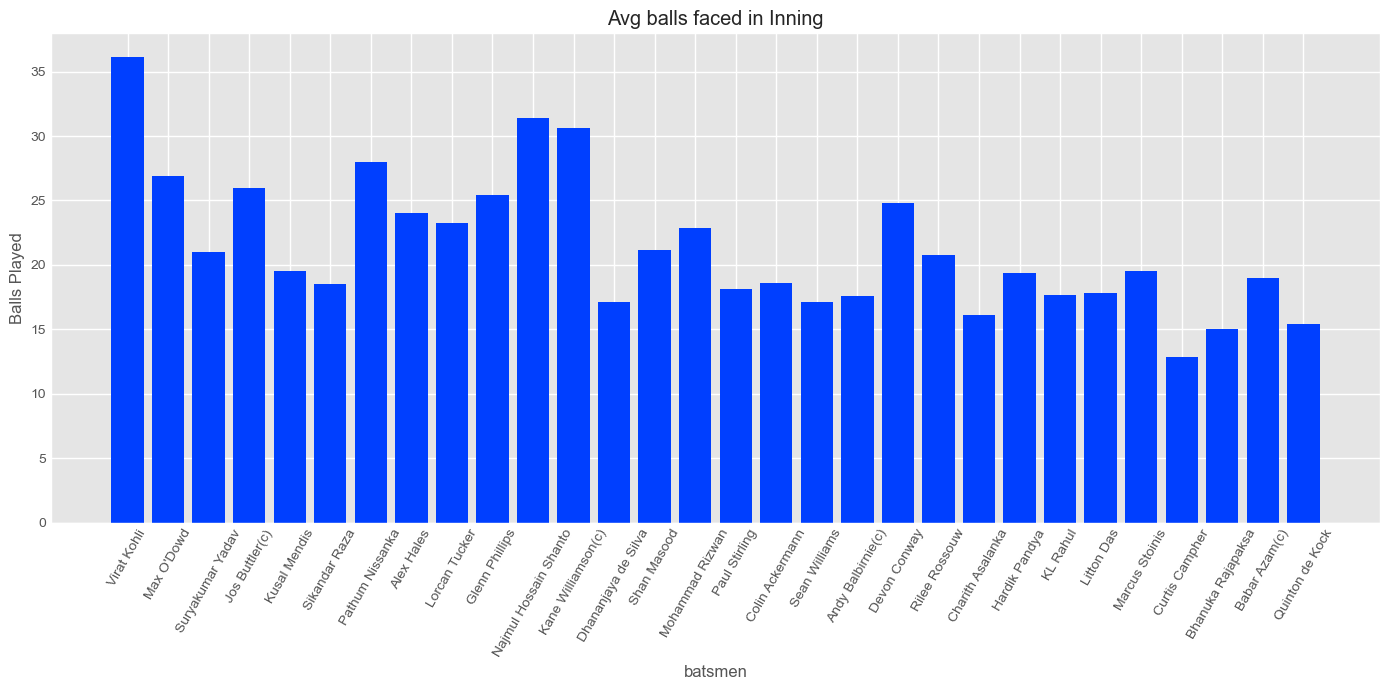

In [28]:
plt.style.use('seaborn-bright') 
plt.figure(figsize=(14,7))
plt.bar(top30batsmen['batsmanName'],top30batsmen['avgbowlsfaced/inn'] )

plt.xlabel('batsmen')
plt.ylabel('Balls Played')
plt.xticks(rotation=60)
plt.grid(True)
plt.title('Avg balls faced in Inning')
plt.tight_layout()

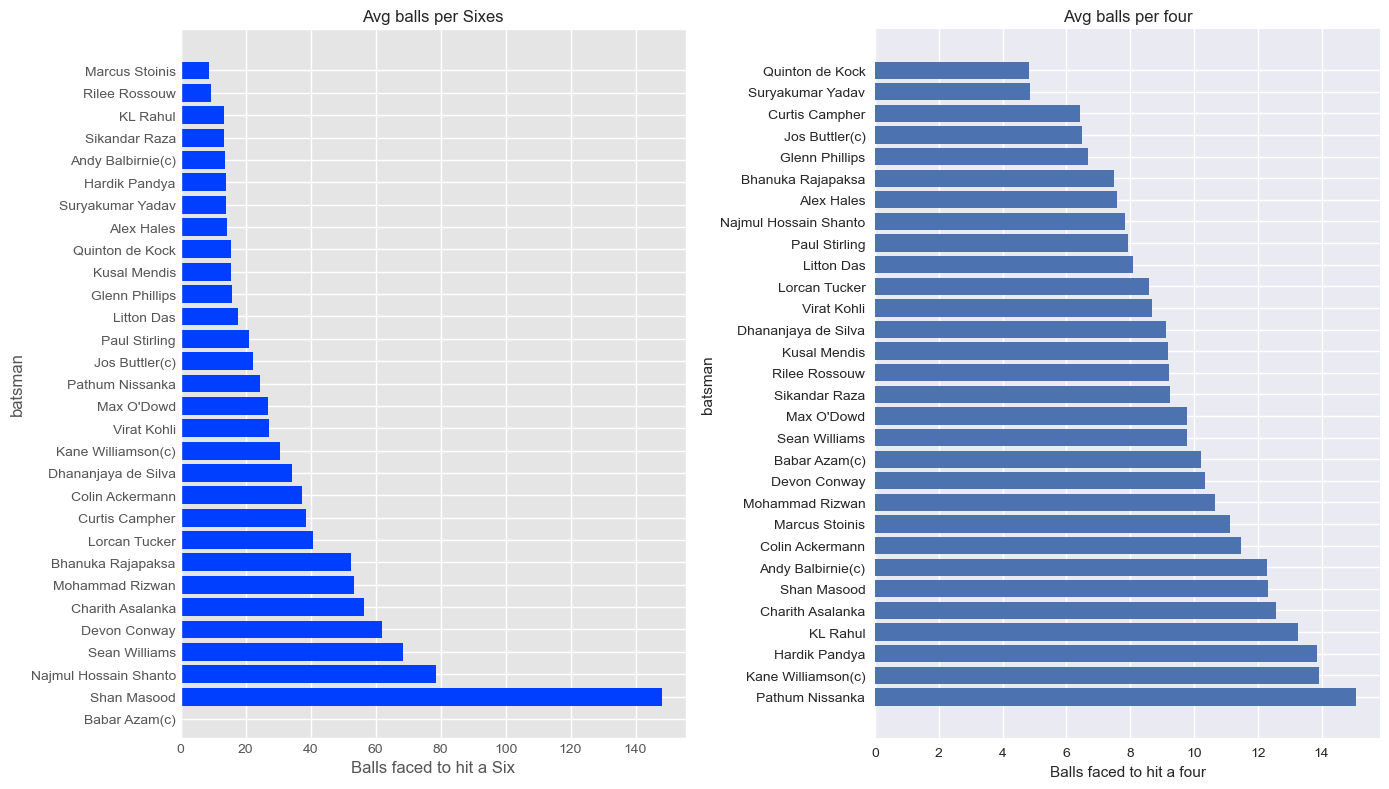

In [29]:
plt.figure(figsize=(14,8))


top30batsmen=top30batsmen.sort_values('6hittingrate',ascending=False)
plt.subplot(1,2,1)

plt.style.use('seaborn')
plt.barh(top30batsmen['batsmanName'],top30batsmen['6hittingrate'])

plt.xlabel('Balls faced to hit a Six')
plt.ylabel('batsman')

plt.grid(True)

plt.title('Avg balls per Sixes')
plt.tight_layout()


top30batsmen=top30batsmen.sort_values('4hittingrate',ascending=False)
plt.subplot(1,2,2)


plt.style.use('seaborn')
plt.barh(top30batsmen['batsmanName'],top30batsmen['4hittingrate'])

plt.xlabel('Balls faced to hit a four')
plt.ylabel('batsman')

plt.grid(True)

plt.title('Avg balls per four')
plt.tight_layout()

In [30]:
bowling_df['innings']=1

bowling_stats=bowling_df.groupby('bowlerName').sum('wickets').sort_values('wickets',ascending=False)

In [31]:
bowling_stats['dec'] = bowling_stats['overs'] % 1
bowling_stats['integer'] = bowling_stats['overs'] // 1
bowling_stats['overs2']=((bowling_stats['dec']/0.1)*(1/6))+bowling_stats['integer']
bowling_stats['bowling_Run_rate']=(bowling_stats['runs']/bowling_stats['overs2'])

In [32]:
bowling_stats['total_bowls_bowled']=(bowling_stats['dec']/0.1)+((bowling_stats['integer'])*6)

In [33]:
bowling_stats['StrikeRatebowling']=bowling_stats['runs']/bowling_stats['wickets']

In [34]:
bowling_stats['bowls per six']=bowling_stats['total_bowls_bowled']/bowling_stats['6s']

In [35]:
bowling_stats['bowls per four']=bowling_stats['total_bowls_bowled']/bowling_stats['4s']

In [36]:
bowling_stats['bowls per boundary']=bowling_stats['total_bowls_bowled']/(bowling_stats['4s']+bowling_stats['6s'])

In [37]:
bowling_stats['bowling_average']=bowling_stats['total_bowls_bowled']/bowling_stats['wickets']
bowling_stats.reset_index(inplace=True)

In [38]:
bowling_stats

,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,...,dec,integer,overs2,bowling_Run_rate,total_bowls_bowled,StrikeRatebowling,bowls per six,bowls per four,bowls per boundary,bowling_average
0,Wanindu Hasaranga de Silva,31.0,1,199,15,54.16,74,9,8,0,...,0.0,31.0,31.000000,6.419355,186.0,13.266667,23.25,20.666667,10.941176,12.400000
1,Bas de Leede,22.0,0,169,13,55.15,50,14,4,7,...,0.0,22.0,22.000000,7.681818,132.0,13.000000,33.00,9.428571,7.333333,10.153846
2,Sam Curran,22.4,0,148,13,39.80,66,9,5,3,...,0.4,22.0,22.666667,6.529412,136.0,11.384615,27.20,15.111111,9.714286,10.461538
3,Blessing Muzarabani,26.0,0,199,12,53.00,71,21,5,4,...,0.0,26.0,26.000000,7.653846,156.0,16.583333,31.20,7.428571,6.000000,13.000000
4,Paul van Meekeren,31.0,0,198,11,52.25,85,15,3,5,...,0.0,31.0,31.000000,6.387097,186.0,18.000000,62.00,12.400000,10.333333,16.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Calum MacLeod,1.0,0,11,0,11.00,0,0,1,0,...,0.0,1.0,1.000000,11.000000,6.0,inf,6.00,inf,6.000000,inf
128,Cameron Green,2.0,0,13,0,6.50,7,1,1,0,...,0.0,2.0,2.000000,6.500000,12.0,inf,12.00,12.000000,6.000000,inf
129,Shoriful Islam,4.0,0,57,0,14.25,7,4,4,2,...,0.0,4.0,4.000000,14.250000,24.0,inf,6.00,6.000000,3.000000,inf
130,Jan Nicol Loftie-Eaton,1.0,0,8,0,8.00,2,1,0,0,...,0.0,1.0,1.000000,8.000000,6.0,inf,inf,6.000000,6.000000,inf


In [39]:
bowling_stats_top30=bowling_stats.head(30) 

In [40]:
bowling_stats_top30

,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,...,dec,integer,overs2,bowling_Run_rate,total_bowls_bowled,StrikeRatebowling,bowls per six,bowls per four,bowls per boundary,bowling_average
0,Wanindu Hasaranga de Silva,31.0,1,199,15,54.16,74,9,8,0,...,0.0,31.0,31.000000,6.419355,186.0,13.266667,23.250000,20.666667,10.941176,12.400000
1,Bas de Leede,22.0,0,169,13,55.15,50,14,4,7,...,0.0,22.0,22.000000,7.681818,132.0,13.000000,33.000000,9.428571,7.333333,10.153846
2,Sam Curran,22.4,0,148,13,39.80,66,9,5,3,...,0.4,22.0,22.666667,6.529412,136.0,11.384615,27.200000,15.111111,9.714286,10.461538
3,Blessing Muzarabani,26.0,0,199,12,53.00,71,21,5,4,...,0.0,26.0,26.000000,7.653846,156.0,16.583333,31.200000,7.428571,6.000000,13.000000
4,Paul van Meekeren,31.0,0,198,11,52.25,85,15,3,5,...,0.0,31.0,31.000000,6.387097,186.0,18.000000,62.000000,12.400000,10.333333,16.909091
5,Josh Little,27.0,0,189,11,48.58,68,16,4,8,...,0.0,27.0,27.000000,7.000000,162.0,17.181818,40.500000,10.125000,8.100000,14.727273
6,Shadab Khan,26.0,0,165,11,45.25,59,13,2,0,...,0.0,26.0,26.000000,6.346154,156.0,15.000000,78.000000,12.000000,10.400000,14.181818
7,Shaheen Shah Afridi,25.1,0,155,11,42.66,70,15,1,2,...,0.1,25.0,25.166667,6.158940,151.0,14.090909,151.000000,10.066667,9.437500,13.727273
8,Anrich Nortje,17.3,0,94,11,26.35,58,3,5,0,...,0.3,17.0,17.500000,5.371429,105.0,8.545455,21.000000,35.000000,13.125000,9.545455
9,Sikandar Raza,24.0,0,156,10,55.08,46,5,4,5,...,0.0,24.0,24.000000,6.500000,144.0,15.600000,36.000000,28.800000,16.000000,14.400000


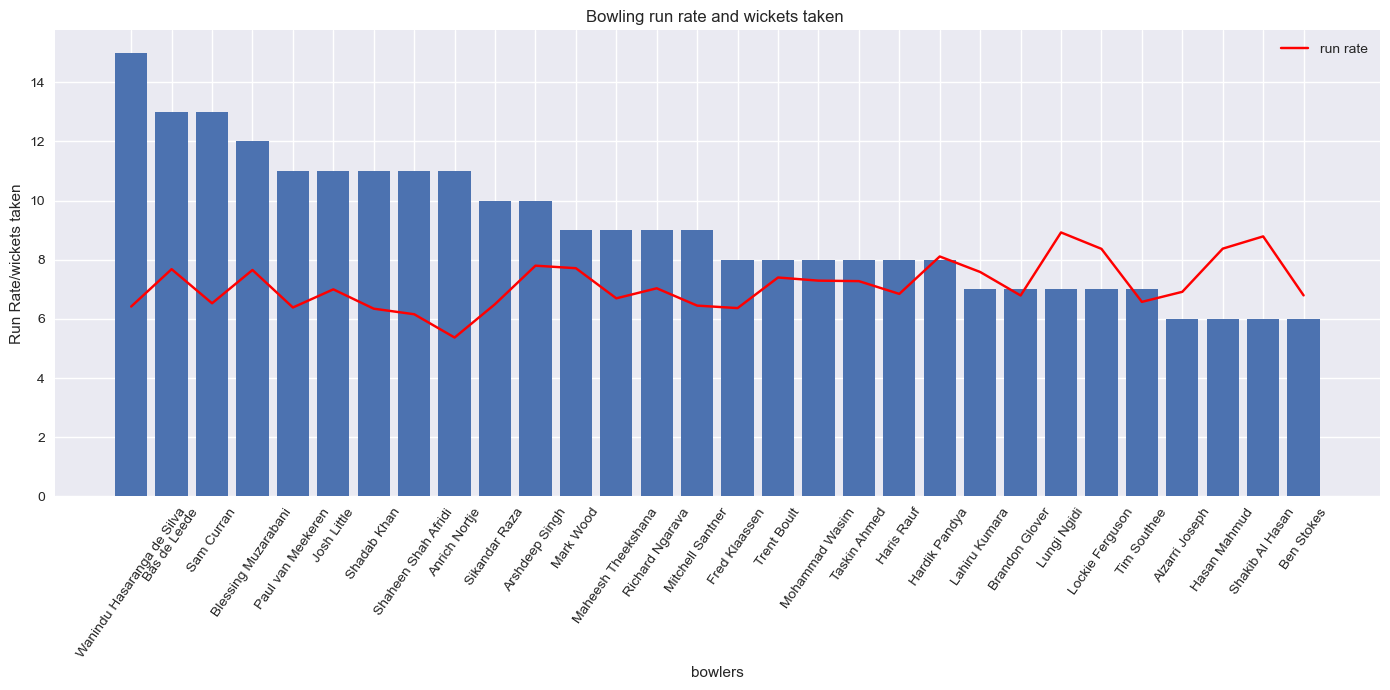

In [41]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-notebook')
plt.bar(bowling_stats_top30['bowlerName'],bowling_stats_top30['wickets'])
plt.plot(bowling_stats_top30['bowlerName'],bowling_stats_top30['bowling_Run_rate'],label='run rate',color='red')
plt.xlabel('bowlers')
plt.legend()
plt.xticks(rotation=55)
plt.ylabel('Run Rate/wickets taken')
plt.title('Bowling run rate and wickets taken ')
plt.tight_layout()

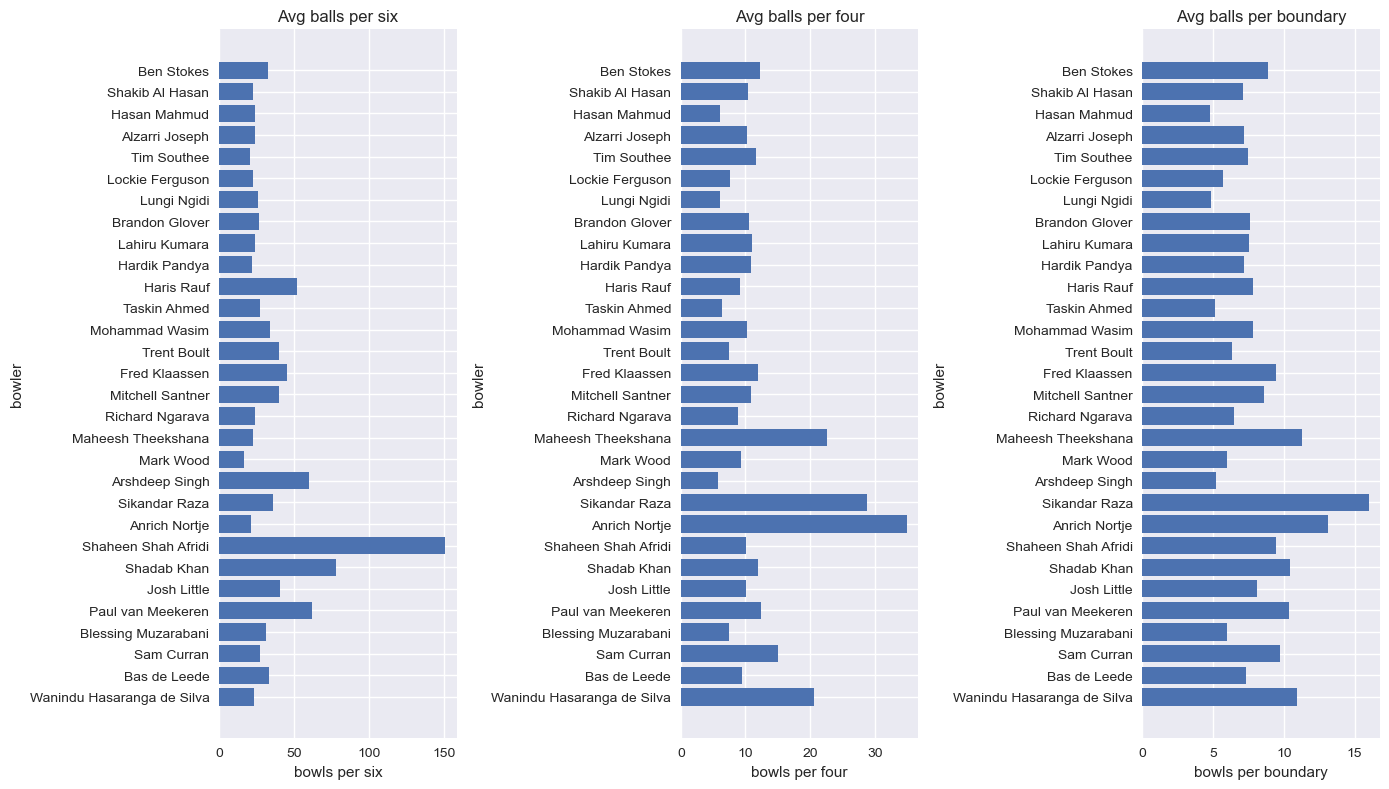

In [42]:
plt.figure(figsize=(14,8))
plt.subplot(1,3,1)

plt.style.use('seaborn')
plt.barh(bowling_stats_top30['bowlerName'],bowling_stats_top30['bowls per six'])

plt.xlabel('bowls per six')
plt.ylabel('bowler')

plt.grid(True)

plt.title('Avg balls per six')
plt.tight_layout()

plt.subplot(1,3,2)

plt.style.use('seaborn')
plt.barh(bowling_stats_top30['bowlerName'],bowling_stats_top30['bowls per four'])


plt.xlabel('bowls per four')
plt.ylabel('bowler')

plt.grid(True)

plt.title('Avg balls per four')


plt.subplot(1,3,3)
plt.style.use('seaborn')
plt.barh(bowling_stats_top30['bowlerName'],bowling_stats_top30['bowls per boundary'])


plt.xlabel('bowls per boundary')
plt.ylabel('bowler')

plt.grid(True)

plt.title('Avg balls per boundary')
plt.tight_layout()

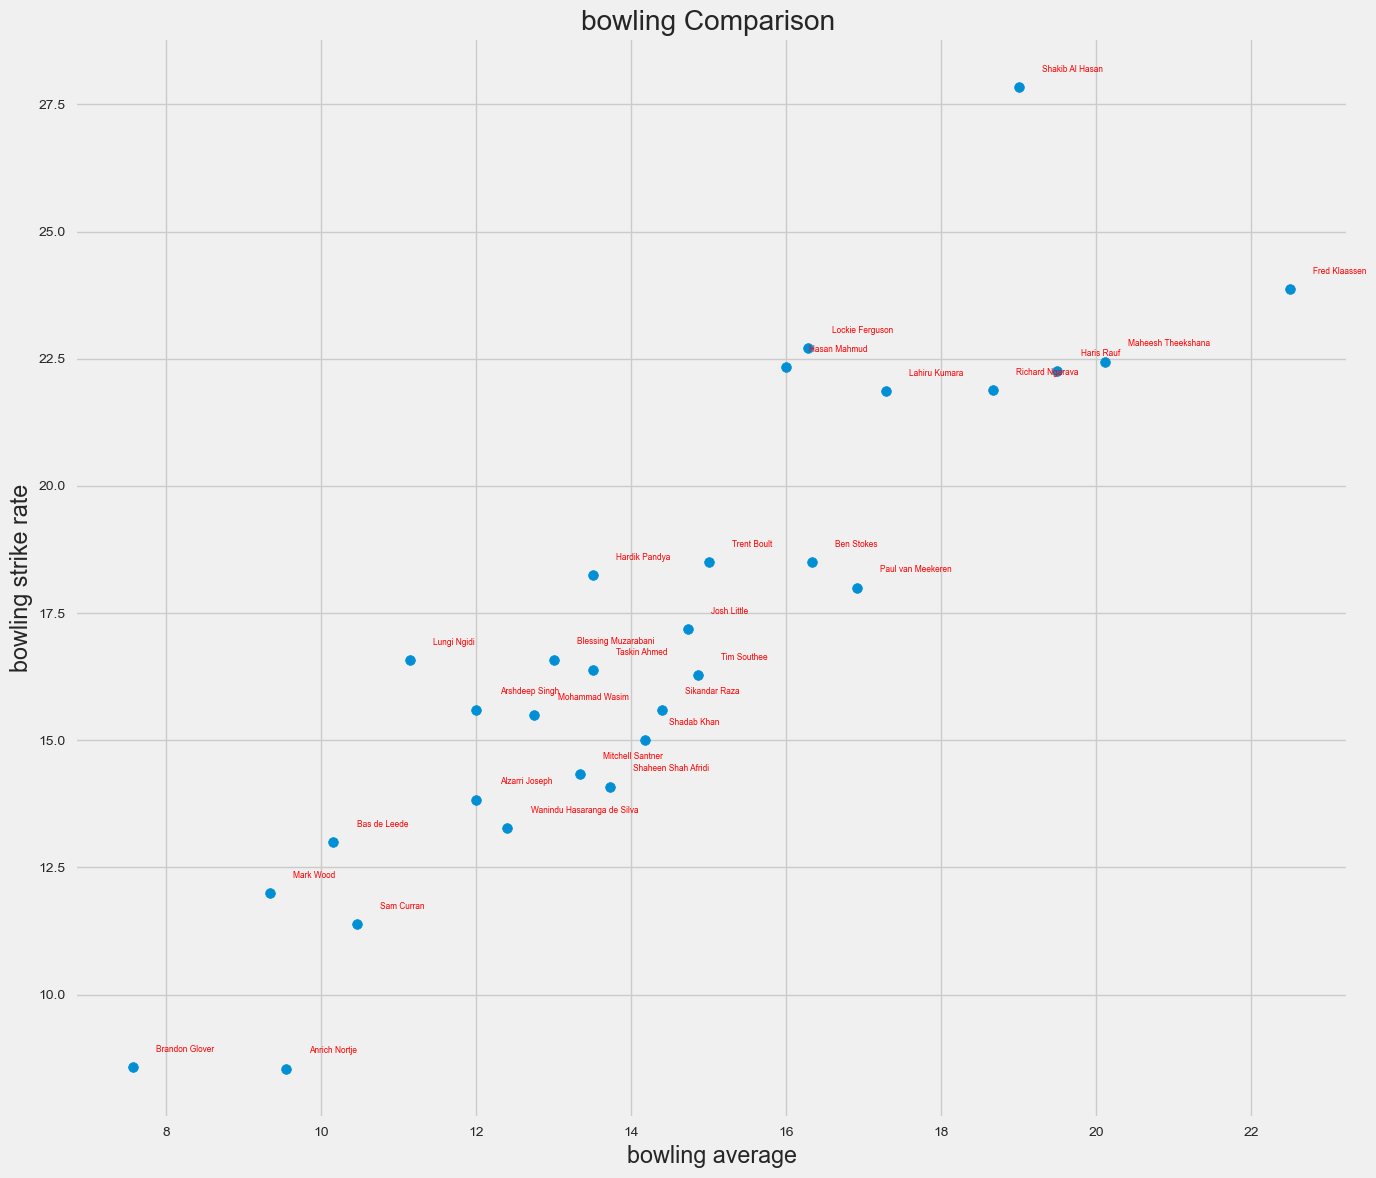

In [43]:
name=bowling_stats_top30['bowlerName']
bavg=bowling_stats_top30['bowling_average']
bsr=bowling_stats_top30['StrikeRatebowling']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
plt.scatter(bavg,bsr)
plt.xlabel('bowling average')
plt.ylabel('bowling strike rate')
plt.title('bowling Comparison ')
for i in range(bowling_stats_top30.shape[0]):
     text=plt.text(x=bavg[i]+0.3,y=bsr[i]+0.3,s=name[i],
                fontdict=dict(color='red',size=6))
        
plt.tight_layout()

In [44]:
bowling_stats_top30['%dotballs']=(bowling_stats_top30['0s']/bowling_stats_top30['total_bowls_bowled'])*100

C:\Users\RISHABH\AppData\Local\Temp\ipykernel_8620\2712533527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowling_stats_top30['%dotballs']=(bowling_stats_top30['0s']/bowling_stats_top30['total_bowls_bowled'])*100


In [45]:
bowling_stats_top30

,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,...,integer,overs2,bowling_Run_rate,total_bowls_bowled,StrikeRatebowling,bowls per six,bowls per four,bowls per boundary,bowling_average,%dotballs
0,Wanindu Hasaranga de Silva,31.0,1,199,15,54.16,74,9,8,0,...,31.0,31.000000,6.419355,186.0,13.266667,23.250000,20.666667,10.941176,12.400000,39.784946
1,Bas de Leede,22.0,0,169,13,55.15,50,14,4,7,...,22.0,22.000000,7.681818,132.0,13.000000,33.000000,9.428571,7.333333,10.153846,37.878788
2,Sam Curran,22.4,0,148,13,39.80,66,9,5,3,...,22.0,22.666667,6.529412,136.0,11.384615,27.200000,15.111111,9.714286,10.461538,48.529412
3,Blessing Muzarabani,26.0,0,199,12,53.00,71,21,5,4,...,26.0,26.000000,7.653846,156.0,16.583333,31.200000,7.428571,6.000000,13.000000,45.512821
4,Paul van Meekeren,31.0,0,198,11,52.25,85,15,3,5,...,31.0,31.000000,6.387097,186.0,18.000000,62.000000,12.400000,10.333333,16.909091,45.698925
5,Josh Little,27.0,0,189,11,48.58,68,16,4,8,...,27.0,27.000000,7.000000,162.0,17.181818,40.500000,10.125000,8.100000,14.727273,41.975309
6,Shadab Khan,26.0,0,165,11,45.25,59,13,2,0,...,26.0,26.000000,6.346154,156.0,15.000000,78.000000,12.000000,10.400000,14.181818,37.820513
7,Shaheen Shah Afridi,25.1,0,155,11,42.66,70,15,1,2,...,25.0,25.166667,6.158940,151.0,14.090909,151.000000,10.066667,9.437500,13.727273,46.357616
8,Anrich Nortje,17.3,0,94,11,26.35,58,3,5,0,...,17.0,17.500000,5.371429,105.0,8.545455,21.000000,35.000000,13.125000,9.545455,55.238095
9,Sikandar Raza,24.0,0,156,10,55.08,46,5,4,5,...,24.0,24.000000,6.500000,144.0,15.600000,36.000000,28.800000,16.000000,14.400000,31.944444


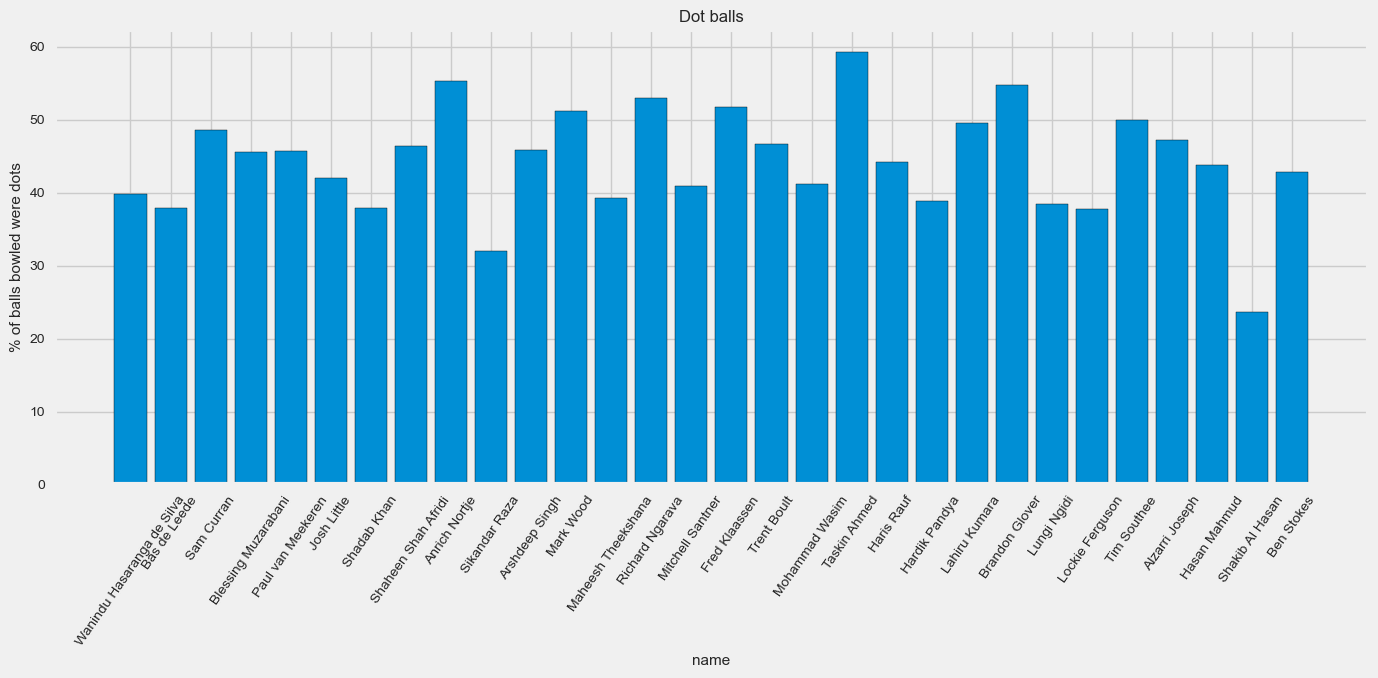

In [46]:
plt.style.use('seaborn-v0_8-notebook')
plt.figure(figsize=(14,7))
plt.bar(name,bowling_stats_top30['%dotballs'] ,edgecolor='black')#here we can see that bins are to be choosen and we can choose as we want  

plt.xlabel('name')
plt.xticks(rotation=55)
plt.ylabel('% of balls bowled were dots')
plt.title('Dot balls')
plt.tight_layout()

In [47]:
all_rounder_stats=pd.merge(batting_stats,bowling_stats,left_on="batsmanName", right_on="bowlerName")

In [48]:
all_rounder_stats

,runs_x,balls,4s_x,6s_x,innings_x,BattingAvg,StrikeRate,BoundaryRuns,%runsinboundary,avgbowlsfaced/inn,...,dec,integer,overs2,bowling_Run_rate,total_bowls_bowled,StrikeRatebowling,bowls per six,bowls per four,bowls per boundary,bowling_average
0,219,148,16,11,8,27.375000,147.972973,130,59.360731,18.500000,...,0.0,24.0,24.000000,6.500000,144.0,15.600000,36.0,28.800000,16.000000,14.400000
1,177,137,15,4,8,25.285714,129.197080,84,47.457627,17.125000,...,0.1,12.0,12.166667,6.821918,73.0,13.833333,73.0,14.600000,12.166667,12.166667
2,165,149,13,4,8,23.571429,110.738255,76,46.060606,18.625000,...,0.0,7.0,7.000000,5.285714,42.0,37.000000,inf,14.000000,14.000000,42.000000
3,155,137,14,2,8,19.375000,113.138686,68,43.870968,17.125000,...,0.0,18.0,18.000000,6.166667,108.0,22.200000,108.0,27.000000,21.600000,21.600000
4,131,113,9,2,7,26.200000,115.929204,48,36.641221,16.142857,...,0.0,1.0,1.000000,8.000000,6.0,inf,inf,6.000000,6.000000,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0,1,0,0,1,0.000000,0.000000,0,NaN,1.000000,...,0.0,6.0,6.000000,10.000000,36.0,60.000000,18.0,12.000000,7.200000,36.000000
109,0,5,0,0,2,0.000000,0.000000,0,NaN,2.500000,...,0.0,16.0,16.000000,8.375000,96.0,22.333333,24.0,6.000000,4.800000,16.000000
110,0,1,0,0,1,0.000000,0.000000,0,NaN,1.000000,...,0.0,12.0,12.000000,6.916667,72.0,13.833333,24.0,10.285714,7.200000,12.000000
111,0,0,0,0,1,NaN,NaN,0,NaN,0.000000,...,0.0,4.0,4.000000,5.250000,24.0,7.000000,inf,12.000000,12.000000,8.000000


In [49]:
all_rounder_stats['runs_scored']=all_rounder_stats['runs_x']
all_rounder_stats['runs_conceded']=all_rounder_stats['runs_y']

In [51]:
all_rounder_stats.drop(columns=['runs_x','runs_y'],inplace=True)

In [52]:
all_rounder_stats=all_rounder_stats[['bowlerName','runs_scored','BattingAvg', 'StrikeRate', '%runsinboundary', 'avgbowlsfaced/inn',
        'wickets','runs_conceded','overs', 'maiden', 'economy', 'bowling_Run_rate',
       'StrikeRatebowling', 'bowling_average']]

In [53]:
all_rounder_stats

,bowlerName,runs_scored,BattingAvg,StrikeRate,%runsinboundary,avgbowlsfaced/inn,wickets,runs_conceded,overs,maiden,economy,bowling_Run_rate,StrikeRatebowling,bowling_average
0,Sikandar Raza,219,27.375000,147.972973,59.360731,18.500000,10,156,24.0,0,55.08,6.500000,15.600000,14.400000
1,Dhananjaya de Silva,177,25.285714,129.197080,47.457627,17.125000,6,83,12.1,0,41.80,6.821918,13.833333,12.166667
2,Colin Ackermann,165,23.571429,110.738255,46.060606,18.625000,1,37,7.0,0,14.99,5.285714,37.000000,42.000000
3,Sean Williams,155,19.375000,113.138686,43.870968,17.125000,5,111,18.0,0,42.65,6.166667,22.200000,21.600000
4,Charith Asalanka,131,26.200000,115.929204,36.641221,16.142857,0,8,1.0,0,8.00,8.000000,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Timm van der Gugten,0,0.000000,0.000000,NaN,1.000000,1,60,6.0,0,19.99,10.000000,60.000000,36.000000
109,Hasan Mahmud,0,0.000000,0.000000,NaN,2.500000,6,134,16.0,1,33.50,8.375000,22.333333,16.000000
110,Alzarri Joseph,0,0.000000,0.000000,NaN,1.000000,6,83,12.0,0,20.75,6.916667,13.833333,12.000000
111,Naveen-ul-Haq,0,NaN,NaN,NaN,0.000000,3,21,4.0,0,5.25,5.250000,7.000000,8.000000


In [54]:
all_rounder_stats = all_rounder_stats.rename(columns={'bowlerName':'Name'})

In [55]:
filt=all_rounder_stats['runs_scored']>50  

In [56]:
all_rounder_stats=all_rounder_stats[filt]

In [57]:
filt2=all_rounder_stats['wickets']>5

In [58]:
all_rounder_stats=all_rounder_stats[filt2]

In [59]:
all_rounder_stats.reset_index(inplace=True)

In [60]:
all_rounder_stats.drop(columns=['index'],inplace=True)

In [61]:
all_rounder_stats

,Name,runs_scored,BattingAvg,StrikeRate,%runsinboundary,avgbowlsfaced/inn,wickets,runs_conceded,overs,maiden,economy,bowling_Run_rate,StrikeRatebowling,bowling_average
0,Sikandar Raza,219,27.375000,147.972973,59.360731,18.500000,10,156,24.0,0,55.08,6.500000,15.600000,14.400000
1,Dhananjaya de Silva,177,25.285714,129.197080,47.457627,17.125000,6,83,12.1,0,41.80,6.821918,13.833333,12.166667
2,Hardik Pandya,128,25.600000,131.958763,54.687500,19.400000,8,146,18.0,0,49.74,8.111111,18.250000,13.500000
3,Ben Stokes,110,36.666667,105.769231,30.909091,20.800000,6,111,16.2,0,43.17,6.795918,18.500000,16.333333
4,Shadab Khan,98,24.500000,168.965517,59.183673,9.666667,11,165,26.0,0,45.25,6.346154,15.000000,14.181818
5,Bas de Leede,93,18.600000,79.487179,36.559140,14.625000,13,169,22.0,0,55.15,7.681818,13.000000,10.153846
6,Gareth Delany,69,17.250000,127.777778,49.275362,10.800000,6,185,23.3,0,57.41,7.872340,30.833333,23.500000


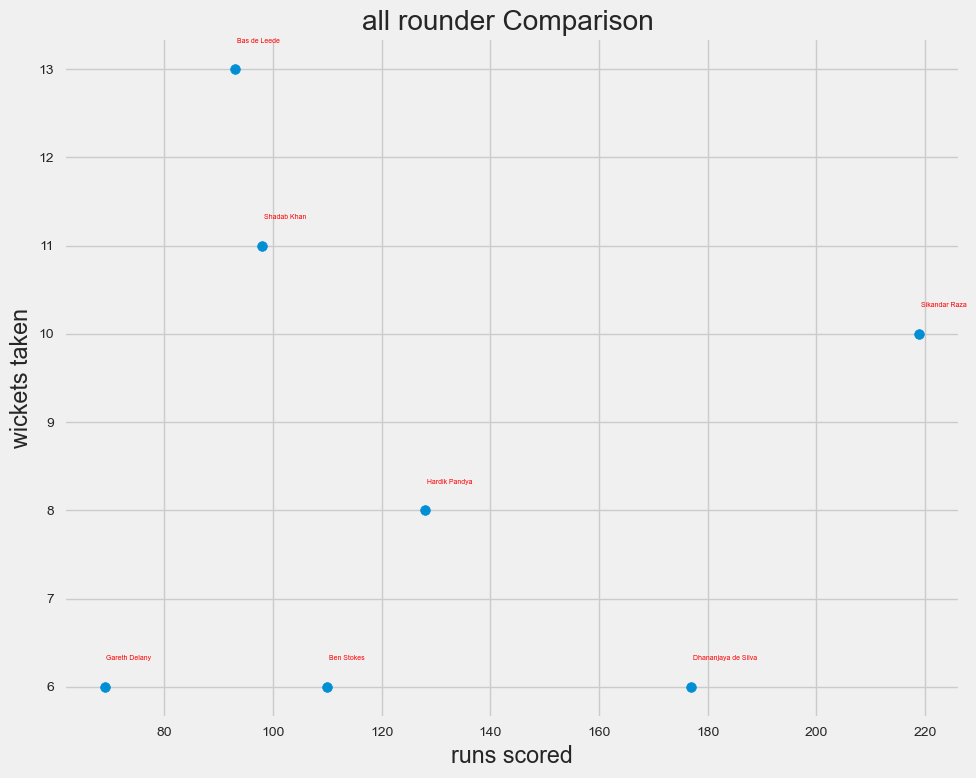

In [62]:
name=all_rounder_stats['Name']
runs=all_rounder_stats['runs_scored']
wickets=all_rounder_stats['wickets']

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.scatter(runs,wickets)
plt.xlabel('runs scored')
plt.ylabel('wickets taken')
plt.title('all rounder Comparison ')
for i in range(all_rounder_stats.shape[0]):
     text=plt.text(x=runs[i]+0.3,y=wickets[i]+0.3,s=name[i],
                fontdict=dict(color='red',size=5))
        
plt.tight_layout()

In [63]:
all_rounder_stats.to_excel('all_rounder_data.xlsx')

In [66]:
bowling_stats.to_excel('bowling_data.xlsx')

In [67]:
batting_stats.to_excel('batting_data.xlsx')